# Answers to Assignment 3

### **Assignment 3a**

In [1]:
!pip install ucamcl --upgrade
import ucamcl
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment3a')

Waiting for you to log in .. done.


In [2]:
# Import modules, and give them short aliases so we can write e.g. np.foo rather than numpy.foo
import math, random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
# The next line is a piece of magic, to let plots appear in our Jupyter notebooks
%matplotlib inline 

**Question 1:**

In [3]:
import os.path
if os.path.exists('flood.csv'):
    print("file already downloaded")
else:
    !wget "https://teachingfiles.blob.core.windows.net/scicomp/flood.csv"
df = pd.read_csv("flood.csv")
flood = df.loc[df["label"]!="Cam"]
num_rows = len(flood)
GRADER.submit_answer(GRADER.fetch_question('q1'), num_rows)

file already downloaded
Correct!


(True, 15890)

**Question 2:**

In [4]:
df = flood.groupby(['river', 'town']).apply(len)
df = df.unstack(fill_value=0)
GRADER.submit_answer(GRADER.fetch_question('q2'), df.as_matrix())

Correct!


(True, [[2665, 0, 0, 0], [5298, 2617, 2653, 2657]])

**Question 3:**

In [5]:
df2 = flood.groupby(['river', 'town','measure_id']).apply(len)
df2 = df2.groupby(['river', 'town']).apply(len)
df2 = df2.unstack(fill_value=0)
GRADER.submit_answer(GRADER.fetch_question('q3'), df2.as_matrix())


Correct!


(True, [[1, 0, 0, 0], [2, 1, 1, 1]])

**Question 4:**

In [6]:
flood['norm_value']= (flood['value']-flood['low'])/(flood['high']-flood['low'])
tercile1= np.nanpercentile(flood['norm_value'],100/3)
tercile2 = np.nanpercentile(flood['norm_value'],200/3)
GRADER.submit_answer(GRADER.fetch_question('q4'), [tercile1, tercile2])

Correct!


(True, [0.036970243462578906, 0.31511254019292606])

**Question 5:**

In [7]:
f_val = flood["norm_value"]
flood = flood[~pd.isnull(f_val)]
low_f =flood.loc[f_val<=tercile1].groupby(['label']).apply(len)
low_f = pd.DataFrame({'label':low_f.index,'norm_value_tercile':'low','n':low_f.values})   

med_f =flood.loc[f_val<=tercile2].loc[f_val>tercile1].groupby(['label']).apply(len)
med_f = pd.DataFrame({'label':med_f.index,'norm_value_tercile':'med','n':med_f.values})  

high_f =flood.loc[f_val>tercile2].groupby(['label']).apply(len)
high_f = pd.DataFrame({'label':high_f.index,'norm_value_tercile':'high','n':high_f.values})

total_f =flood.groupby(['label']).apply(len)
total_f = pd.DataFrame({'label':total_f.index,'ntot':total_f.values})   

stats = pd.concat([high_f,low_f,med_f,])
stats = stats.merge(total_f,on = 'label')

stats = stats[['label','norm_value_tercile','n','ntot']]
stats 

,label,norm_value_tercile,n,ntot
0,Bin Brook,high,993,2665
1,Bin Brook,low,19,2665
2,Bin Brook,med,1653,2665
3,Cambridge Baits Bite,high,2285,2653
4,Cambridge Baits Bite,low,4,2653
5,Cambridge Baits Bite,med,364,2653
6,Cambridge Jesus Lock,high,1906,2651
7,Cambridge Jesus Lock,low,14,2651
8,Cambridge Jesus Lock,med,731,2651
9,Dernford,high,69,2617


In [8]:
assert np.array_equal(stats.columns, ['label','norm_value_tercile','n','ntot']), 'columns are wrong'
GRADER.submit_answer(GRADER.fetch_question('q5'), stats)

Correct!


(True,
 [{'label': 'Bin Brook', 'n': 19, 'norm_value_tercile': 'low', 'ntot': 2665},
  {'label': 'Bin Brook', 'n': 1653, 'norm_value_tercile': 'med', 'ntot': 2665},
  {'label': 'Bin Brook', 'n': 993, 'norm_value_tercile': 'high', 'ntot': 2665},
  {'label': 'Cambridge', 'n': 2132, 'norm_value_tercile': 'low', 'ntot': 2645},
  {'label': 'Cambridge', 'n': 513, 'norm_value_tercile': 'med', 'ntot': 2645},
  {'label': 'Cambridge Baits Bite',
   'n': 4,
   'norm_value_tercile': 'low',
   'ntot': 2653},
  {'label': 'Cambridge Baits Bite',
   'n': 364,
   'norm_value_tercile': 'med',
   'ntot': 2653},
  {'label': 'Cambridge Baits Bite',
   'n': 2285,
   'norm_value_tercile': 'high',
   'ntot': 2653},
  {'label': 'Cambridge Jesus Lock',
   'n': 14,
   'norm_value_tercile': 'low',
   'ntot': 2651},
  {'label': 'Cambridge Jesus Lock',
   'n': 731,
   'norm_value_tercile': 'med',
   'ntot': 2651},
  {'label': 'Cambridge Jesus Lock',
   'n': 1906,
   'norm_value_tercile': 'high',
   'ntot': 2651},
 

**Question 6**

In [9]:
stats2 = stats.copy(deep=True)
stats2["n"] = stats2["n"]/stats2["ntot"]
stats2 = stats2.groupby(['label', 'norm_value_tercile']).apply(lambda x: np.squeeze(x.values)[2])
stats2 = stats2.unstack(fill_value=0)
stats2 = pd.DataFrame({'label':stats2.index, 'high':stats2.values[:,0],'low':stats2.values[:,1],'med':stats2.values[:,2]})
stats2 = stats2[['label','low','med','high']]
stats2

,label,low,med,high
0,Bin Brook,0.007129,0.620263,0.372608
1,Cambridge,0.806049,0.193951,0.000000
2,Cambridge Baits Bite,0.001508,0.137203,0.861289
3,Cambridge Jesus Lock,0.005281,0.275745,0.718974
4,Dernford,0.943447,0.030187,0.026366
5,Weston Bampfylde,0.252917,0.747083,0.000000


In [10]:
# Submit your answer:
assert np.array_equal(stats2.columns, ['label','low','med','high']), 'columns are wrong'
GRADER.submit_answer(GRADER.fetch_question('q6'), stats2)

Correct!


(True,
 [{'high': 0.3726078799249531,
   'label': 'Bin Brook',
   'low': 0.007129455909943715,
   'med': 0.6202626641651032},
  {'high': 0.0,
   'label': 'Cambridge',
   'low': 0.8060491493383742,
   'med': 0.1939508506616257},
  {'high': 0.8612891066716925,
   'label': 'Cambridge Baits Bite',
   'low': 0.0015077271013946476,
   'med': 0.13720316622691292},
  {'high': 0.7189739720860053,
   'label': 'Cambridge Jesus Lock',
   'low': 0.005281026027913994,
   'med': 0.2757450018860807},
  {'high': 0.026366068016813144,
   'label': 'Dernford',
   'low': 0.9434466946885747,
   'med': 0.030187237294612153},
  {'high': 0.0,
   'label': 'Weston Bampfylde',
   'low': 0.2529168234851336,
   'med': 0.7470831765148664}])

**Question 7:**

In [11]:
low_min = flood[['label','low']].groupby(['label'])['low'].apply(min)
low_min = pd.DataFrame({'label':low_min.index, 'ref': 'low', 'val': low_min.values})
high_max = flood[['label','high']].groupby(['label'])['high'].apply(max)
high_max = pd.DataFrame({'label':high_max.index, 'ref': 'high', 'val': high_max.values})
flood_val = pd.concat([low_min, high_max])
flood_val

,label,ref,val
0,Bin Brook,low,0.057
1,Cambridge,low,0.141
2,Cambridge Baits Bite,low,0.218
3,Cambridge Jesus Lock,low,0.637
4,Dernford,low,0.127
5,Weston Bampfylde,low,0.026
0,Bin Brook,high,0.368
1,Cambridge,high,1.250
2,Cambridge Baits Bite,high,0.294
3,Cambridge Jesus Lock,high,0.740


In [12]:
GRADER.submit_answer(GRADER.fetch_question('q7'), flood_val)

Correct!


(True,
 [{'label': 'Bin Brook', 'ref': 'high', 'val': 0.368},
  {'label': 'Bin Brook', 'ref': 'low', 'val': 0.057},
  {'label': 'Cambridge', 'ref': 'high', 'val': 1.25},
  {'label': 'Cambridge', 'ref': 'low', 'val': 0.141},
  {'label': 'Cambridge Baits Bite', 'ref': 'high', 'val': 0.294},
  {'label': 'Cambridge Baits Bite', 'ref': 'low', 'val': 0.218},
  {'label': 'Cambridge Jesus Lock', 'ref': 'high', 'val': 0.74},
  {'label': 'Cambridge Jesus Lock', 'ref': 'low', 'val': 0.637},
  {'label': 'Dernford', 'ref': 'high', 'val': 0.395},
  {'label': 'Dernford', 'ref': 'low', 'val': 0.127},
  {'label': 'Weston Bampfylde', 'ref': 'high', 'val': 0.6},
  {'label': 'Weston Bampfylde', 'ref': 'low', 'val': 0.026000000000000002}])

### **Assignment 3b**

**Question 8:**

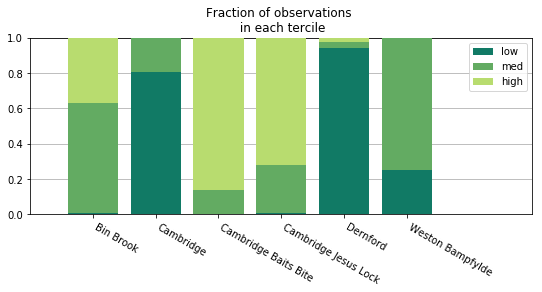

In [13]:
with plt.rc_context({'figure.figsize': (9,3.25)}):
    ax = plt.gca()
    ax.yaxis.grid(True)
    N = len(stats2["low"])
    ax.set_xlim(-1,N+1)
    indices = np.arange(N)
    p1 = plt.bar(indices, stats2["low"],color='#117A65',zorder=3)
    p2 = plt.bar(indices, stats2["med"],bottom=stats2["low"],
                 color='#63AB62',zorder=3)
    p3 = plt.bar(indices, stats2["high"],bottom=
                 (stats2["med"]+stats2["low"]),color='#b8dc6f',zorder=3)   
plt.title('Fraction of observations \n in each tercile')
plt.xticks(indices, stats2["label"],rotation=-30, ha='left')

plt.legend((p1[0], p2[0],p3[0]), ('low', 'med','high'))
plt.show()

**Question 9:**

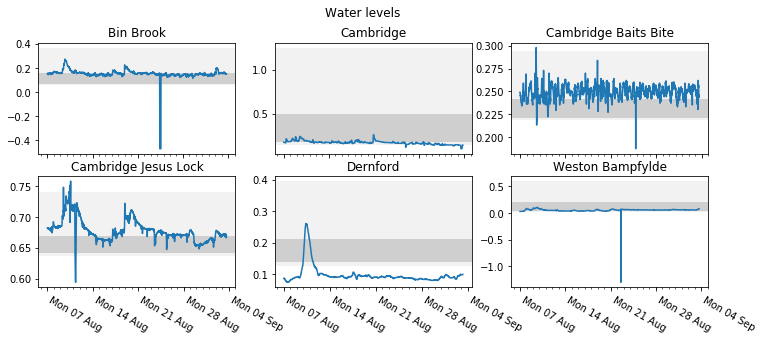

In [14]:
# Create a column with datetime objects
import datetime, pytz
def as_datetime(s): 
    return datetime.datetime.strptime(s, '%Y-%m-%dT%H:%M:%SZ').replace(tzinfo=pytz.UTC)
flood = flood.iloc[np.argsort(flood['t'])]
flood['datetime'] = np.vectorize(as_datetime)(flood['t'])
station_names = ["Bin Brook","Cambridge","Cambridge Baits Bite","Cambridge Jesus Lock","Dernford","Weston Bampfylde"]
with plt.rc_context({'figure.figsize': (12,5)}):
    fig = plt.figure()
    for i in range(len(station_names)):
        data = flood.loc[flood["label"]==station_names[i],["value","datetime",'low','high']].reset_index(drop=True)
        low = min(data["low"])
        high = max(data["high"])
        itrange_bottom = low+tercile1*(high-low)
        itrange_top = low+tercile2*(high-low)
        ax = fig.add_subplot(2, 3, i+1)
        ax.plot(data["datetime"],data["value"])
        ax.axhspan(low, high, facecolor='0.5', alpha=0.1)
        ax.axhspan(itrange_bottom, itrange_top, facecolor='0.5', alpha=0.3)
        # Date-axis control, taken from http://matplotlib.org/examples/api/date_demo.html
        # Given a matplotlib axis, print out date labels nicely
        ax.xaxis.set_major_locator(matplotlib.dates.WeekdayLocator(byweekday=matplotlib.dates.MO, tz=pytz.UTC))
        ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator(tz=pytz.UTC))
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%a %d %b'))
        plt.title(station_names[i])
        if i < 3: ax.set_xticklabels([])
fig.autofmt_xdate(bottom=0.2, rotation=-30, ha='left')
fig.suptitle('Water levels')
plt.show()   